# 0. 
Import the data and declare your package dependencies.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

avocadoes = pd.read_csv("Data/avocado-updated-2020.csv")

# 1. 
Briefly describe the data set. What information does it contain?

The avocado-updated-2020.csv data set contains information on avocado sales trends through the year 2020. It includes variables such as the total volume of avocados sold, average price per unit, size categories (e.g., 4046, 4225, 4770). It also includes the number of bags and size of bags sold. It is organized by different geographical regions, avocado types (conventional or organic), and the year.

In [2]:
avocadoes.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


# 2. 
Clean the data in any way you see fit.

In [3]:
avocado_clean = avocadoes[['date', 'average_price', 'total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year','geography']]
avocado_clean["geography"].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton',
       'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville', 'New Orleans/Mobile',
       'New York', 'Northeast', 'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [4]:
avocado_clean = avocado_clean.rename(columns={'4046': 'Small', '4225': 'Large', '4770':'Xlarge'})

avocado_clean.head()

,date,average_price,total_volume,Small,Large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [5]:
# Define the full mapping of geography to region type
region_mapping = {
    'West': 'Major Region',
    'Northeast': 'Major Region',
    'Southeast': 'Major Region',
    'South Central': 'Major Region',
    'Midsouth': 'Major Region',
    'Great Lakes': 'Major Region',
    'Plains': 'Major Region',
    'California': 'Major Region',
    'South Carolina': 'Major Region',
    'West Tex/New Mexico': 'Major Region',
    'Northern New England': 'Major Region',   
    'Total U.S.': 'Total U.S.',
    
    'Albany': 'Metro Region',
    'Atlanta': 'Metro Region',
    'Baltimore/Washington': 'Metro Region',
    'Boise': 'Metro Region',
    'Boston': 'Metro Region',
    'Buffalo/Rochester': 'Metro Region',
    'Charlotte': 'Metro Region',
    'Chicago': 'Metro Region',
    'Cincinnati/Dayton': 'Metro Region',
    'Columbus': 'Metro Region',
    'Dallas/Ft. Worth': 'Metro Region',
    'Denver': 'Metro Region',
    'Detroit': 'Metro Region',
    'Grand Rapids': 'Metro Region',
    'Harrisburg/Scranton': 'Metro Region',
    'Hartford/Springfield': 'Metro Region',
    'Houston': 'Metro Region',
    'Indianapolis': 'Metro Region',
    'Jacksonville': 'Metro Region',
    'Las Vegas': 'Metro Region',
    'Los Angeles': 'Metro Region',
    'Louisville': 'Metro Region',
    'Miami/Ft. Lauderdale': 'Metro Region',
    'Nashville': 'Metro Region',
    'New Orleans/Mobile': 'Metro Region',
    'New York': 'Metro Region',
    'Orlando': 'Metro Region',
    'Philadelphia': 'Metro Region',
    'Phoenix/Tucson': 'Metro Region',
    'Pittsburgh': 'Metro Region',
    'Portland': 'Metro Region',
    'Raleigh/Greensboro': 'Metro Region',
    'Richmond/Norfolk': 'Metro Region',
    'Roanoke': 'Metro Region',
    'Sacramento': 'Metro Region',
    'San Diego': 'Metro Region',
    'San Francisco': 'Metro Region',
    'Seattle': 'Metro Region',
    'Spokane': 'Metro Region',
    'St. Louis': 'Metro Region',
    'Syracuse': 'Metro Region',
    'Tampa': 'Metro Region' 
}

# Create a new region type column based on the mapping
avocado_clean['region_type'] = avocado_clean['geography'].apply(lambda x: region_mapping.get(x, 'Unknown'))

avocado_clean.head()

,date,average_price,total_volume,Small,Large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro Region
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro Region
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro Region
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro Region
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro Region


# 3. 
Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [6]:
major_regions_2017_organic = avocado_clean[(avocado_clean['region_type'] == 'Major Region') & (avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')]

total_small_hass_by_major_region = major_regions_2017_organic.groupby('geography')['Small'].sum()


In [7]:
total_small_hass_by_major_region

geography
California              1526290.58
Great Lakes              202487.68
Midsouth                 186395.50
Northeast                925832.36
Northern New England       1249.48
Plains                   168583.40
South Carolina            18494.05
South Central           1717104.19
Southeast                285124.34
West                    1870206.29
West Tex/New Mexico      110910.95
Name: Small, dtype: float64

The major geographical region sold the most total organic, small Hass avocados in 2017 was the West Region, with 1870206.29 avocados.

# 4. 
Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [8]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

In [9]:
monthly_avg_volume = avocado_clean.groupby('month')['total_volume'].mean()
monthly_avg_volume

month
1     9.853122e+05
2     1.095374e+06
3     9.957150e+05
4     1.016582e+06
5     1.123632e+06
6     1.051247e+06
7     9.832681e+05
8     9.499249e+05
9     9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

May is the month with the highest average volume of avocado sales with an average volume of 1,123,632 avocados.


# 5. 
Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [10]:
df_metro = avocado_clean[avocado_clean['region_type'] == 'Metro Region']

metro_avg_volume = df_metro.groupby('geography')['total_volume'].mean().reset_index()

top_metro_areas = metro_avg_volume.sort_values(by='total_volume', ascending=False).head(5)
top_metro_names = top_metro_areas['geography'].tolist()

df_top_metro = df_metro[df_metro['geography'].isin(top_metro_names)]

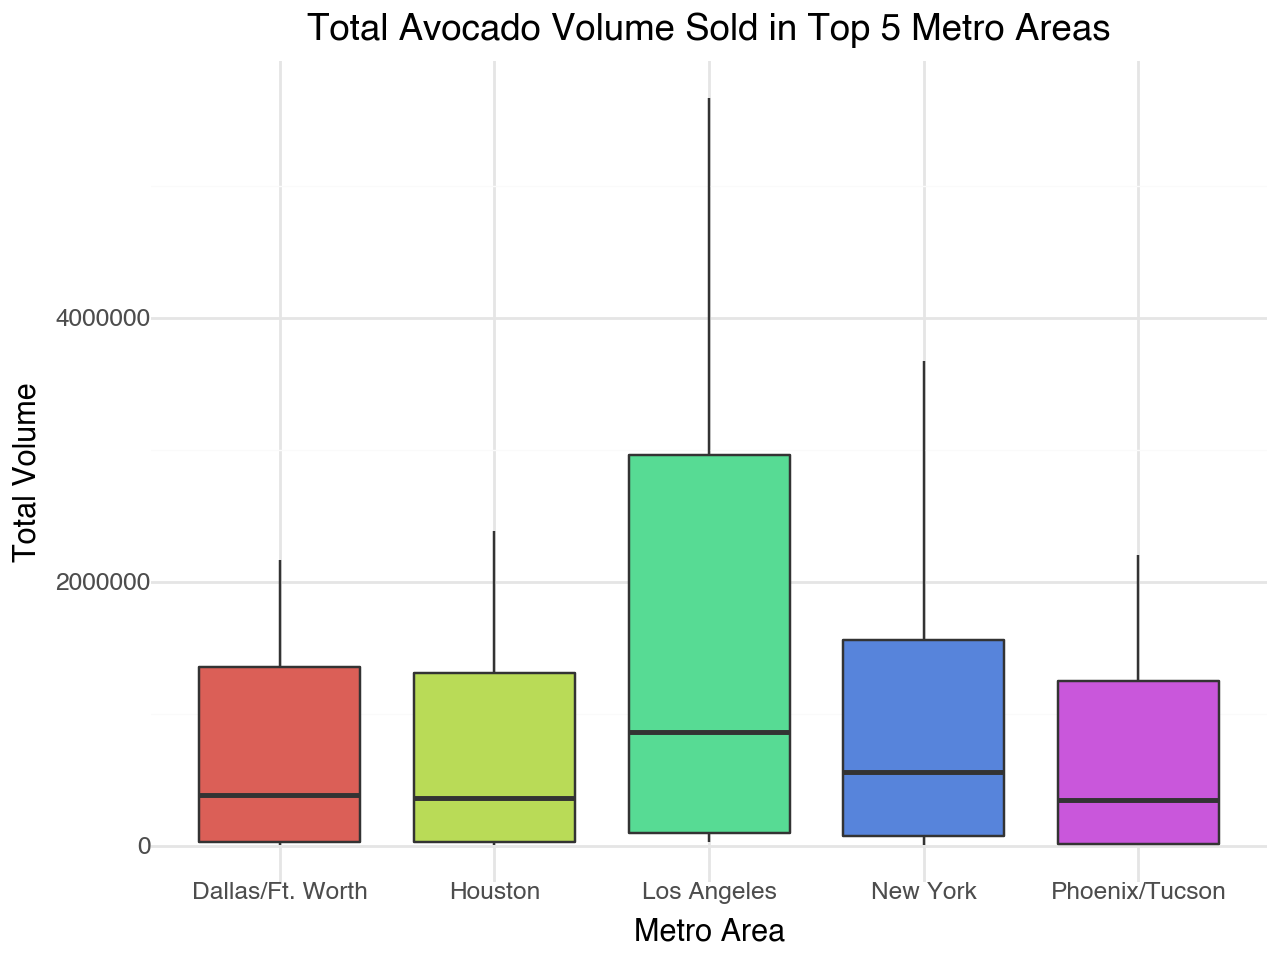

In [11]:

(ggplot(df_top_metro, aes(x='geography', y='total_volume', fill='geography')) +
    geom_boxplot() +
    theme_minimal() +
    guides(fill=False) +
    labs(
        title='Total Avocado Volume Sold in Top 5 Metro Areas',
        x='Metro Area',
        y='Total Volume'
    )
)

# 6. 
From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [21]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california = avocado_clean[avocado_clean['geography'].isin(california_regions)]

california["geography"].unique()



array(['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'], dtype=object)

# 7. 
In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics and a visualization.

In [13]:
price_summary = (california.groupby(['geography', 'type'])['average_price'].mean().unstack())
price_summary['price_difference'] = abs(price_summary['organic'] - price_summary['conventional'])
price_summary

type,conventional,organic,price_difference
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


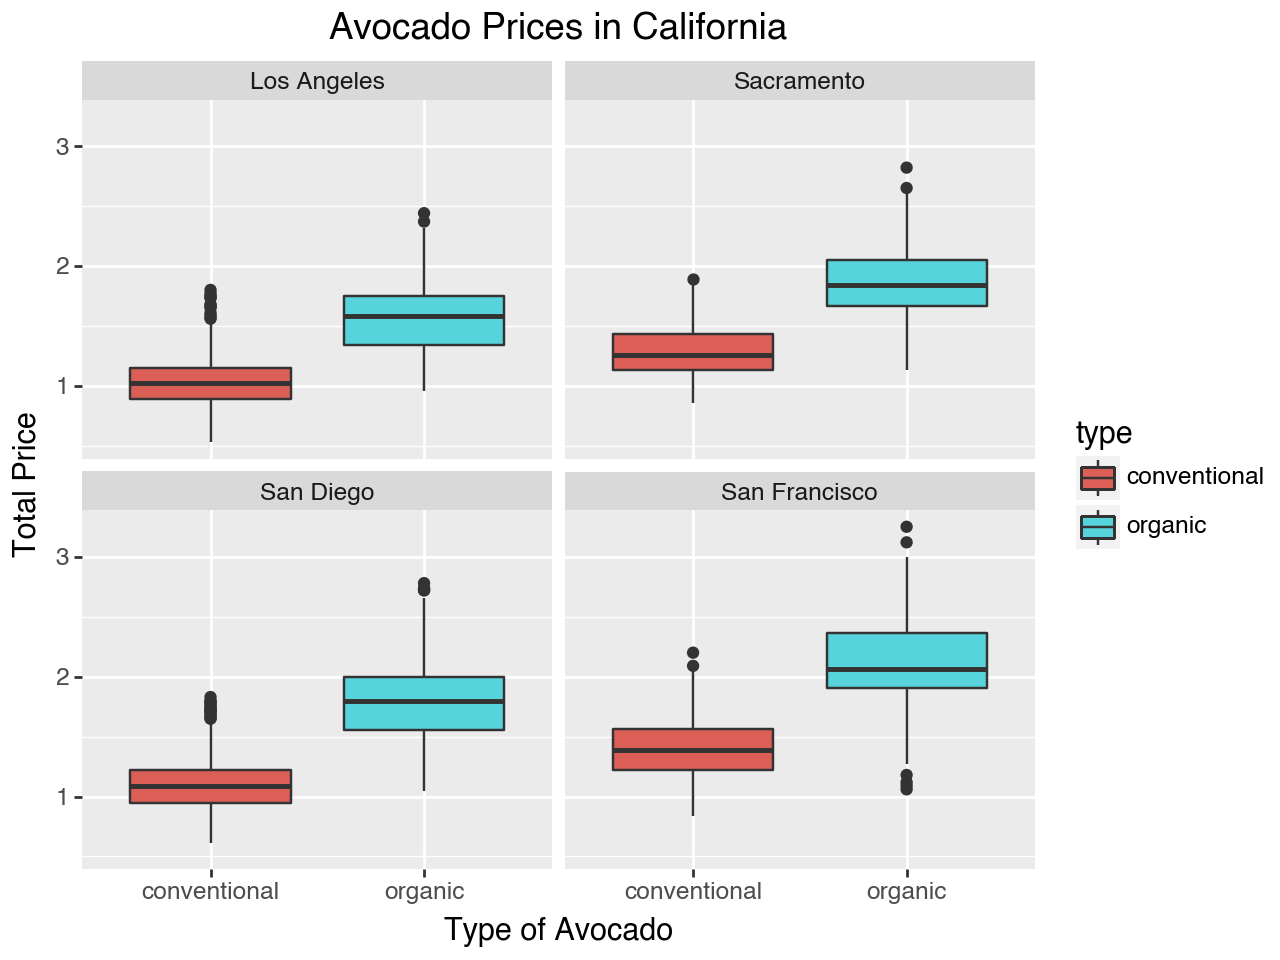

In [14]:
(
ggplot(california, aes(x='type', y='average_price', fill = 'type')) +
geom_boxplot() +
facet_wrap('~geography') +
labs(title='Avocado Prices in California',
    x='Type of Avocado',
    y='Total Price') 
)

Looking at the `price_summary` table, we can see that San Francisco has the largest price difference between organic versus conventional avocados. The price difference between organic and conventional avocados in San Francisco is $0.719.

# 8. 

The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.
![](Images/figure-1.png)

<positron-console-cell-15>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


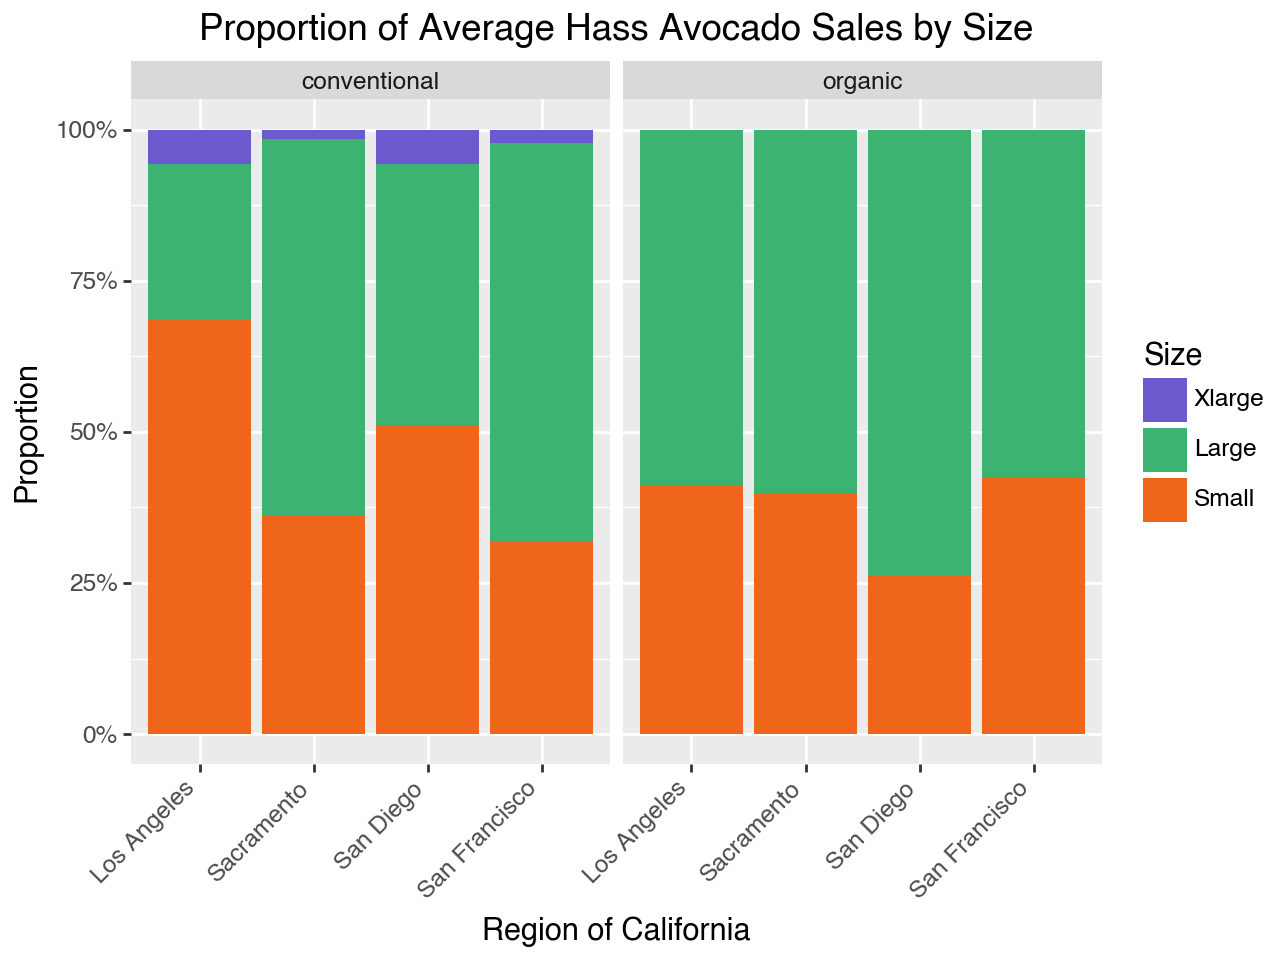

In [15]:

new_ca = california[["geography", "type", "Small", "Large", "Xlarge", "total_volume", "year"]]

new_ca = new_ca.melt(id_vars = ["geography", "type", "total_volume", "year"],
                                    value_vars = ["Small", "Large", "Xlarge"],
                                    var_name = "size",
                                    value_name = "sales")

new_ca["size"] = pd.Categorical(new_ca["size"], categories = ["Xlarge", "Large", "Small"], ordered = True)
new_ca = (new_ca.groupby(["type","geography","size","year"], as_index = False).agg(average_sales = ("sales", "mean")))

(ggplot(new_ca, aes(x='geography', y='average_sales', fill='size')) +
    geom_bar(stat='identity', position='fill') +
    facet_wrap('type') +  
    labs(
        title='Proportion of Average Hass Avocado Sales by Size',
        x='Region of California',
        y='Proportion',
        fill='Size'
    ) +
    scale_fill_manual(values={'Xlarge': '#6A5ACD', 'Large': '#3CB371', 'Small': '#ef661b'}) + 
    scale_y_continuous(labels=lambda x: ["{:.0f}%".format(i * 100) for i in x]) +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)


# Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.


I made my own data set using housing data from the California Association of Relators 

https://www.car.org/marketdata/data/housingdata

In [16]:
housing_data = pd.read_excel("Data/house_pricing.xlsx")

In [35]:
#filter california data
california_avo = california
california_avo["avocado_sales"] = california["average_price"]*california["total_volume"]
california_avo = california.groupby(['year', 'geography']).agg(mean_avocado_sales=('avocado_sales', 'mean')).reset_index()
california_avo.head()

<positron-console-cell-35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,geography,mean_avocado_sales
0,2015,Los Angeles,1.280428e+06
1,2015,Sacramento,2.485519e+05
2,2015,San Diego,2.519179e+05
3,2015,San Francisco,4.865229e+05
4,2016,Los Angeles,1.364411e+06


In [36]:
california_avo_housing = california_avo.merge(housing_data, on=["geography", "year"])
california_avo_housing.head()

,year,geography,mean_avocado_sales,house_prices
0,2015,Los Angeles,1.280428e+06,465314.0
1,2015,Sacramento,2.485519e+05,288942.0
2,2015,San Diego,2.519179e+05,530076.0
3,2015,San Francisco,4.865229e+05,1245519.0
4,2016,Los Angeles,1.364411e+06,493739.0


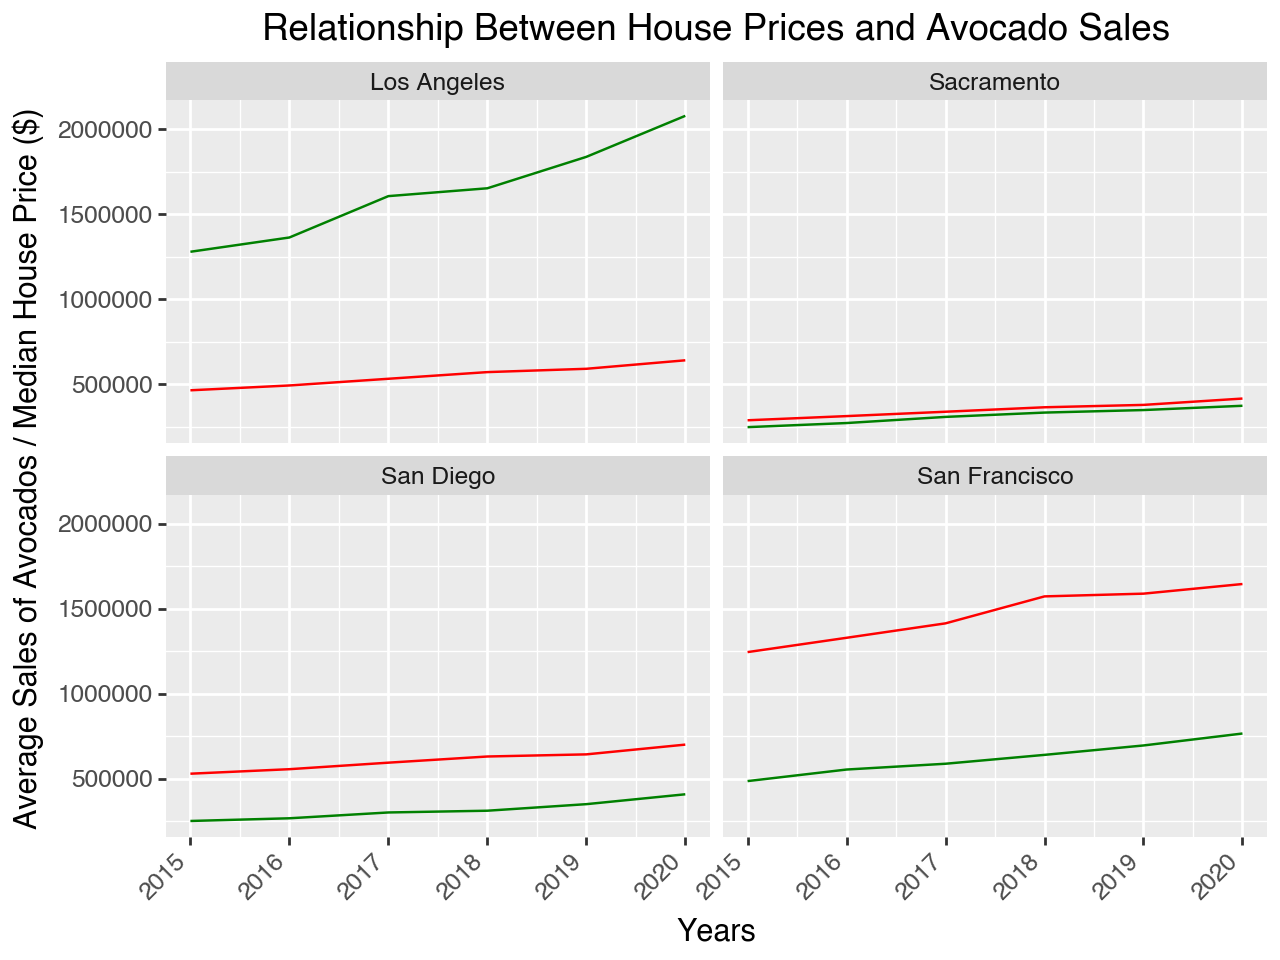

In [39]:
(ggplot(california_avo_housing, aes(x='year'))
 + geom_line(aes(y='house_prices'), color='red')
 + geom_line(aes(y='mean_avocado_sales'), color='green')
 + labs(title='Relationship Between House Prices and Avocado Sales',
        y='Average Sales of Avocados / Median House Price ($)',
        x='Years')
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + facet_wrap('geography'))

The red line reflects the median house price in dollars in each region per year. The green line reflects the average sales of avocados in dollars in each region per year. We can see significantly more is spent on avocados in Los Angeles County than the median house price. So you could say Millennials in LA County are spending too much on avocado toast. This is the only region in which the average sales of avocados is larger than the median house prices in the region. 